# Import

In [1]:
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
# import the necessary packages
import cv2

# Functions

In [2]:
# initialize the list of reference points and boolean indicating
# whether cropping is being performed or not
refPt = []
cropping = False
def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping
    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being
    # performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x, y))
        cropping = False
        # draw a rectangle around the region of interest
        #cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
        #cv2.imshow("image", image)

In [3]:
def calcMatrixFromPic(pathImg, sizePortion, disply):
    print("New Window Opened")
    print("Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of " + 
          "where you want the rectangual to end.\n Once you let go of holding the click, double click \"C\" and done")
    imagePath = pathImg
    img = Image.open(imagePath)
    x,y = img.size
    # load the image, clone it, and setup the mouse callback function
    image = cv2.imread(imagePath)
    clone = image.copy()
    cv2.namedWindow("image")
    image = cv2.resize(image, (int(x/sizePortion), int(y/sizePortion)))   
    cv2.setMouseCallback("image", click_and_crop)
    # keep looping until the 'q' key is pressed
    while True:
        # display the image and wait for a keypress
        cv2.imshow("image", image)
        key = cv2.waitKey(1) & 0xFF
        # if the 'r' key is pressed, reset the cropping region
        if key == ord("r"):
            image = clone.copy()
        # if the 'c' key is pressed, break from the loop
        elif key == ord("c"):
            break
    # if there are two reference points, then crop the region of interest
    # from teh image and display it
    if len(refPt) == 2:
        roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
        cv2.imshow("ROI", roi)
        cv2.waitKey(0)
    # close all open windows
    cv2.destroyAllWindows()
    TINT_COLOR = (90, 200, 10)
    img = Image.open(imagePath)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    im1 = img.crop((refPt[0][0]*sizePortion, refPt[0][1]*sizePortion, refPt[1][0]*sizePortion, refPt[1][1]*sizePortion))
    if disply:
        display(im1)
    return (refPt[0][0]*sizePortion, refPt[0][1]*sizePortion, refPt[1][0]*sizePortion, refPt[1][1]*sizePortion)

In [4]:
def convert2CornersTuple2Matrix4Corner(cornersXY):
    return ((cornersXY[0], cornersXY[1]), (cornersXY[2], cornersXY[1]), (cornersXY[2], cornersXY[3]), (cornersXY[0], cornersXY[3]))

In [5]:
def displayOverallImg(imagePath):
    img = Image.open(imagePath)
    display(img)

# File

In [6]:
imageFile = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_44_1.jpg"

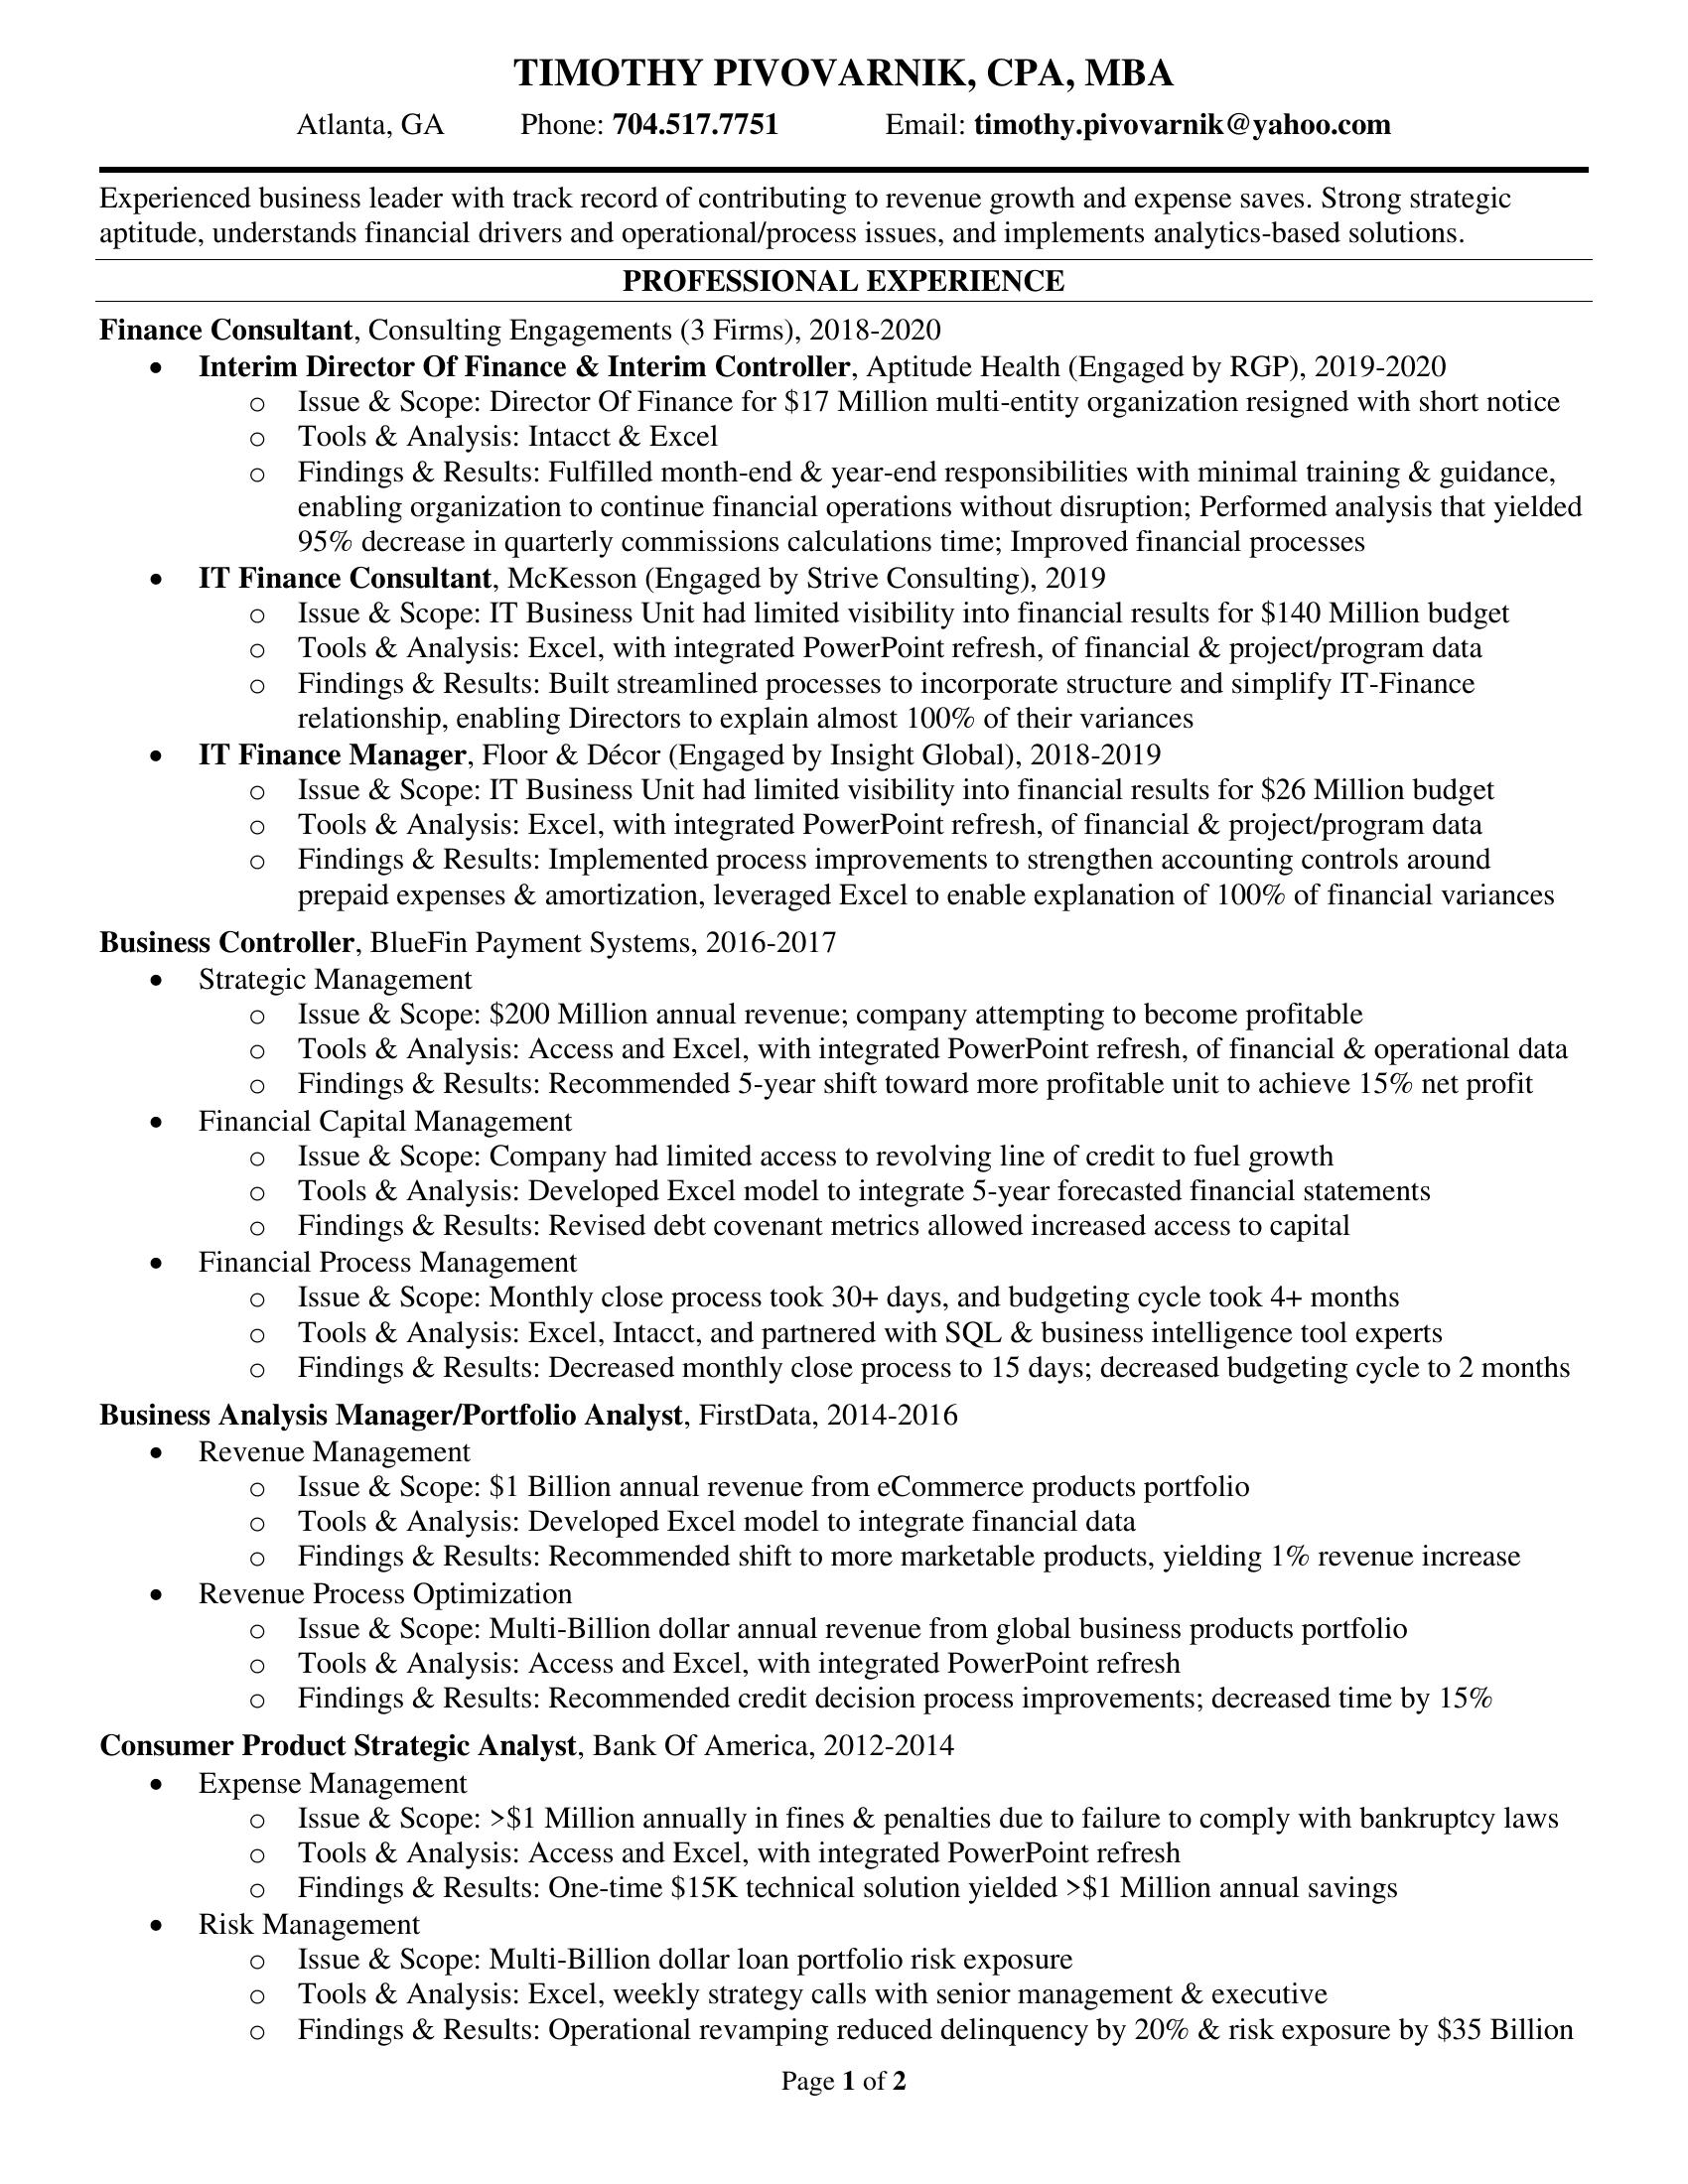

In [7]:
displayOverallImg(imageFile)

In [8]:
numberOfBoldPortions = input("How many times do you want to extract a bold portion from the document?\n")

How many times do you want to extract a bold portion from the document?
9


In [9]:
try:
    numberOfBoldPortions = int(numberOfBoldPortions)
except:
    raise Exception("Please input a Number")

New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


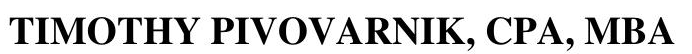

1 -  ((508, 42), (1200, 42), (1200, 96), (508, 96))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


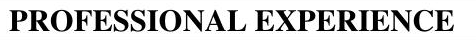

2 -  ((618, 262), (1094, 262), (1094, 302), (618, 302))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


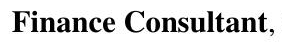

3 -  ((88, 310), (370, 310), (370, 352), (88, 352))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


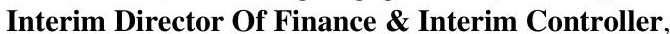

4 -  ((194, 348), (864, 348), (864, 382), (194, 382))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


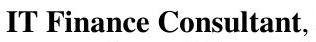

5 -  ((194, 560), (510, 560), (510, 602), (194, 602))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


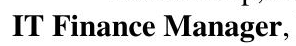

6 -  ((188, 734), (484, 734), (484, 780), (188, 780))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


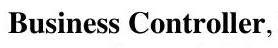

7 -  ((92, 926), (370, 926), (370, 974), (92, 974))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


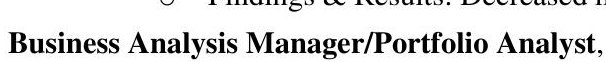

8 -  ((92, 1382), (698, 1382), (698, 1444), (92, 1444))
New Window Opened
Just click and hold where you want the top right of the picture selected and  drag to the bottom right end of where you want the rectangual to end.
 Once you let go of holding the click, double click "C" and done


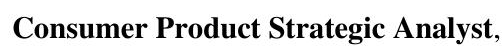

9 -  ((88, 1730), (590, 1730), (590, 1778), (88, 1778))


In [10]:
lstofArray = []
count = 1
while count <= numberOfBoldPortions:
    XY2MATRIX = calcMatrixFromPic(imageFile, 2, True)
    print(str(count) + " - ", end=" ")
    print(convert2CornersTuple2Matrix4Corner(XY2MATRIX))
    lstofArray.append(convert2CornersTuple2Matrix4Corner(XY2MATRIX))
    count+=1

In [14]:
lstofArray

[((508, 40), (1204, 40), (1204, 92), (508, 92))]